In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sna-project-data/astro_data.txt
/kaggle/input/sna-project-data/data.txt


Importing Necessary Packages

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

Astrophysics Network loaded using NetworkX Package

In [3]:
print("Checkpoint: Loading graph from file...")
Gdash = nx.read_edgelist("/kaggle/input/sna-project-data/astro_data.txt", nodetype=int)
print("Graph loaded!")

Checkpoint: Loading graph from file...
Graph loaded!


Degree Distribution of Astrophysics Network

In [4]:
degree_sequence = dict(Gdash.degree())
dmax = max(degree_sequence.values())
dmin = min(degree_sequence.values())

In [5]:
dave = np.mean(list(degree_sequence.values()))
dstd = np.std(list(degree_sequence.values()))

In [6]:
print(dmin, dmax, dave, dstd)

1 360 15.11292533964851 21.22465991279002


In [7]:
degree_counts = Counter(degree_sequence.values())
degree_values = list(degree_counts.keys())
frequencies = list(degree_counts.values())

In [8]:
print(degree_values, len(degree_values))
print(frequencies, len(frequencies))

[36, 1, 17, 29, 9, 5, 33, 14, 27, 10, 19, 54, 90, 11, 39, 12, 4, 3, 16, 2, 37, 44, 22, 38, 47, 7, 35, 100, 75, 105, 8, 89, 61, 40, 42, 21, 6, 31, 32, 24, 62, 81, 94, 34, 71, 73, 66, 112, 28, 101, 43, 67, 59, 20, 51, 48, 26, 91, 13, 18, 70, 74, 49, 225, 30, 147, 72, 80, 79, 140, 132, 41, 25, 53, 15, 50, 111, 95, 353, 284, 76, 23, 45, 115, 107, 329, 104, 244, 159, 69, 127, 148, 52, 58, 126, 157, 84, 65, 60, 156, 56, 55, 129, 46, 85, 57, 78, 86, 124, 119, 118, 83, 114, 242, 98, 120, 166, 144, 108, 360, 299, 116, 296, 291, 103, 181, 146, 202, 63, 87, 117, 64, 68, 215, 77, 102, 96, 88, 143, 193, 173, 188, 82, 151, 92, 135, 130, 113, 134, 122, 93, 137, 97, 163, 131, 158, 155, 170, 99, 121, 145, 142, 106, 110, 128, 207, 125, 123, 150, 165, 174, 152, 149] 173
[57, 1352, 232, 110, 500, 938, 94, 293, 128, 395, 187, 38, 3, 377, 86, 361, 1270, 1573, 229, 1819, 85, 54, 144, 94, 55, 621, 94, 5, 13, 5, 514, 8, 37, 59, 59, 141, 756, 119, 67, 144, 17, 6, 5, 86, 12, 14, 17, 8, 130, 8, 60, 20, 22, 209, 6

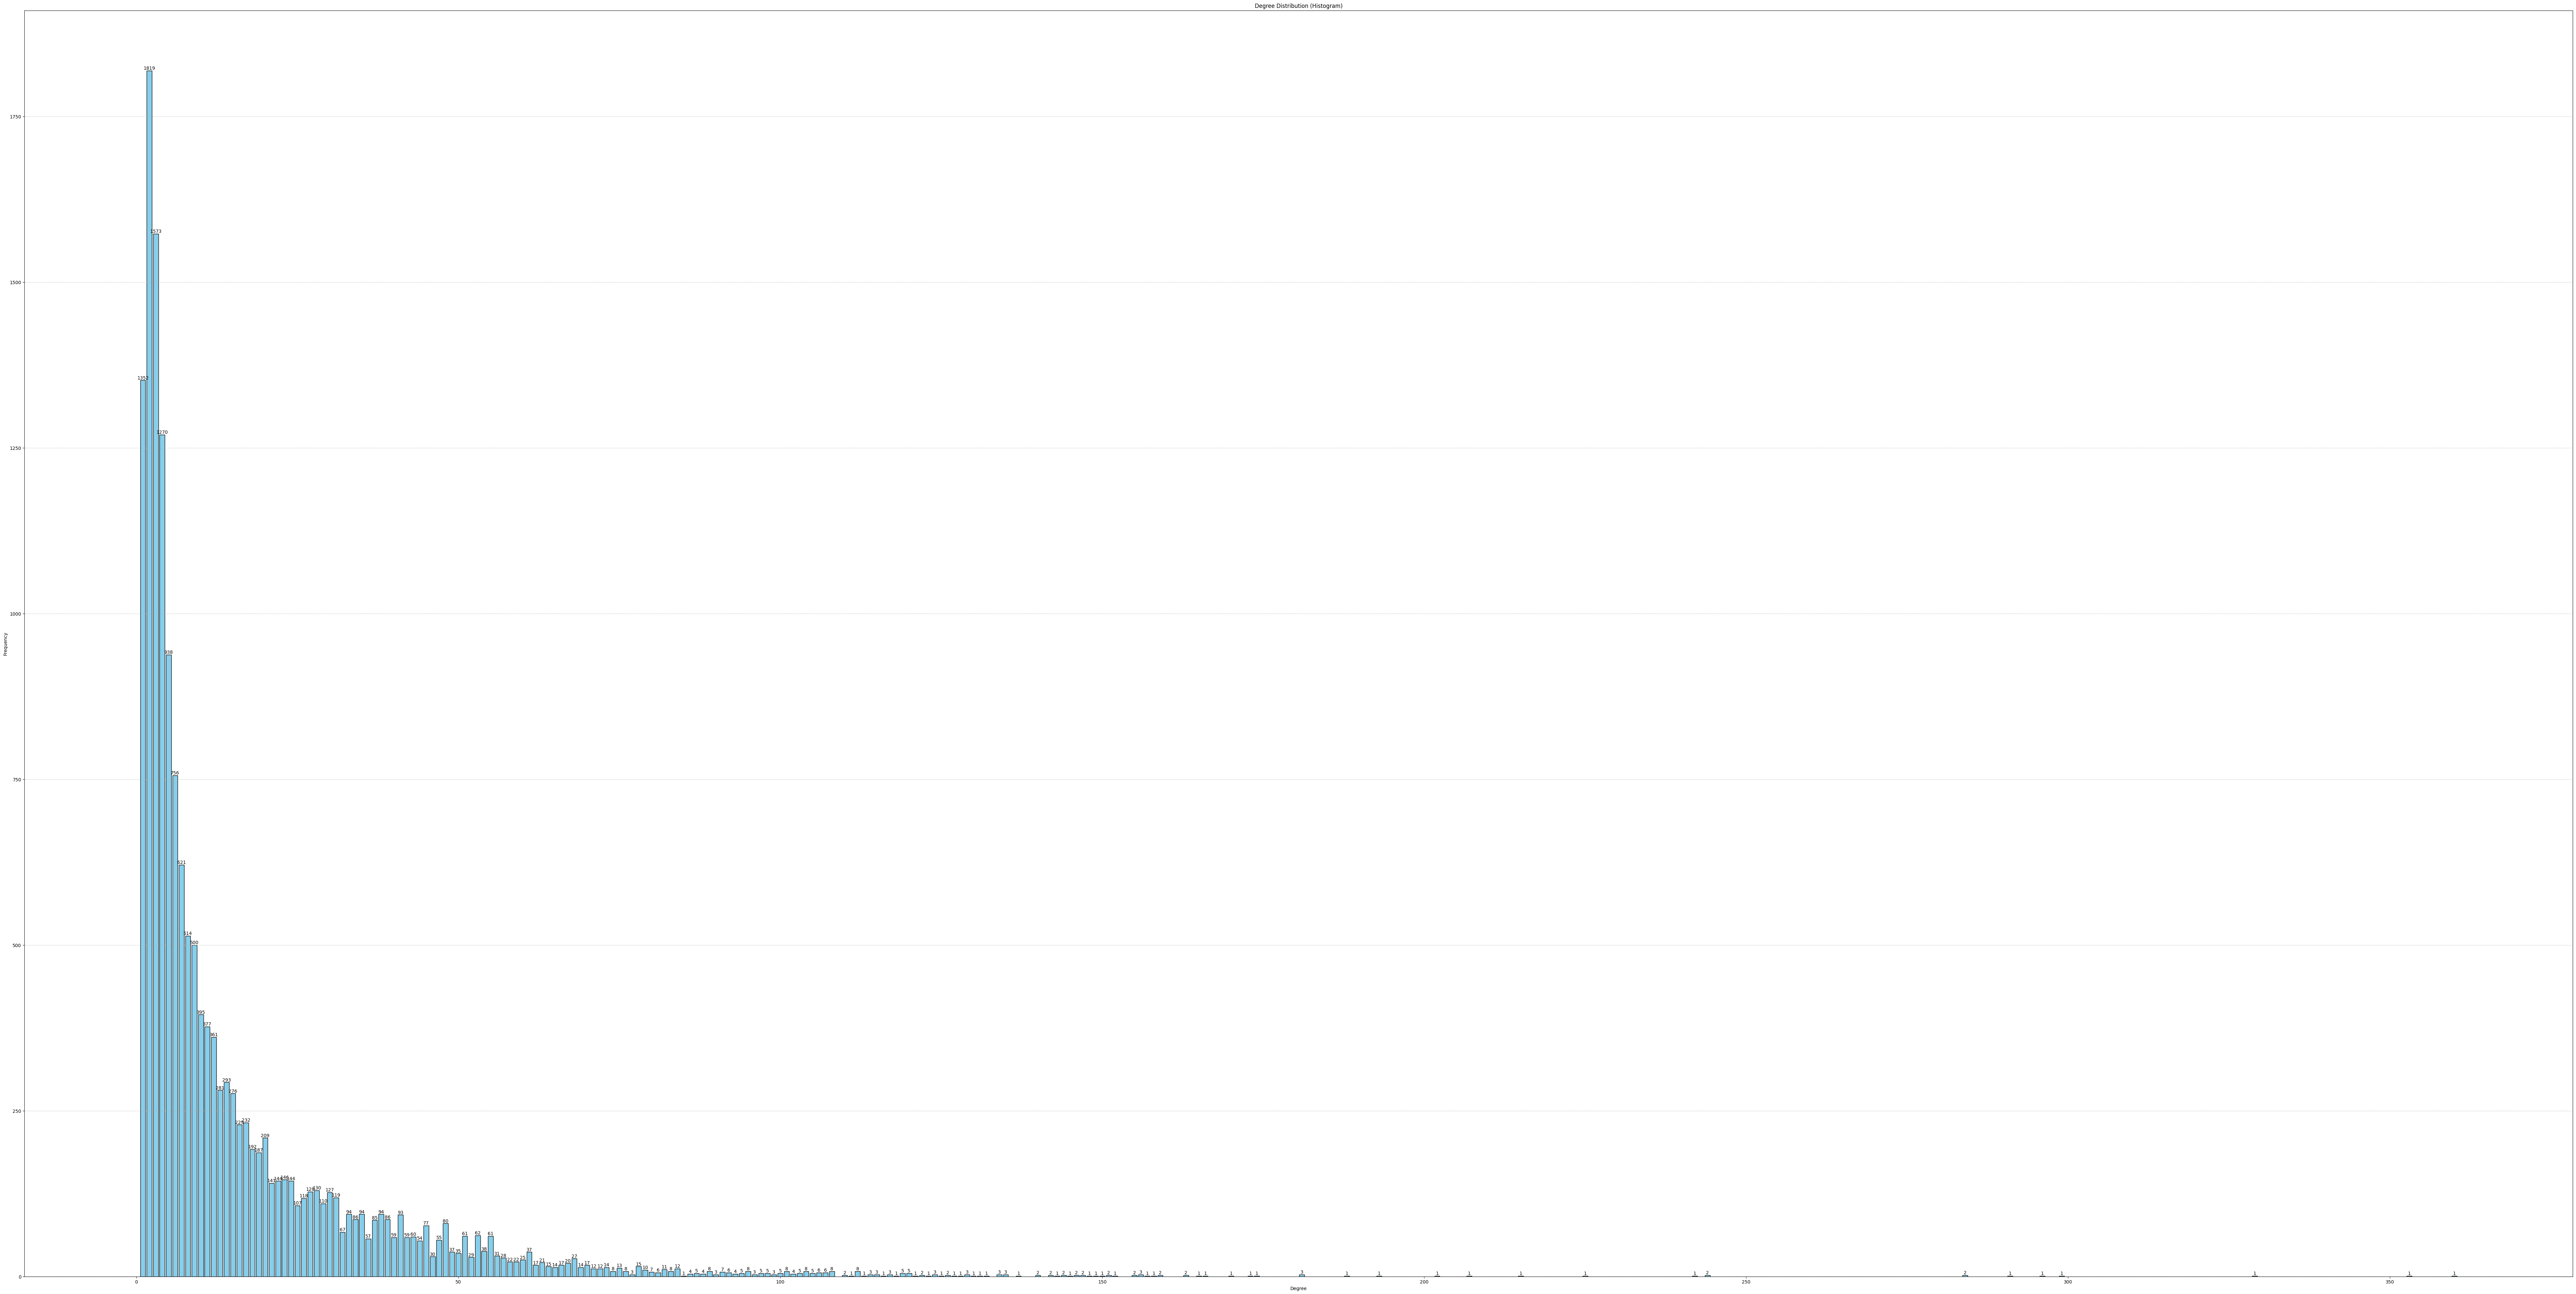

In [9]:
import matplotlib.pyplot as plt

# Assuming degree_values and frequencies are already computed
# degree_values: List of unique degrees in the network
# frequencies: List of frequencies corresponding to each degree

# Create a bar plot
plt.figure(figsize=(100, 50))
bars = plt.bar(degree_values, frequencies, width=0.8, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Histogram)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add frequency labels on top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height (frequency) of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate (center of the bar)
        height + 0.1,                      # y-coordinate (slightly above the bar)
        f'{int(height)}',                  # Text to display (frequency as integer)
        ha='center',                       # Horizontal alignment (centered)
        va='bottom'                        # Vertical alignment (bottom of the text)
    )

# Show the plot
plt.show()

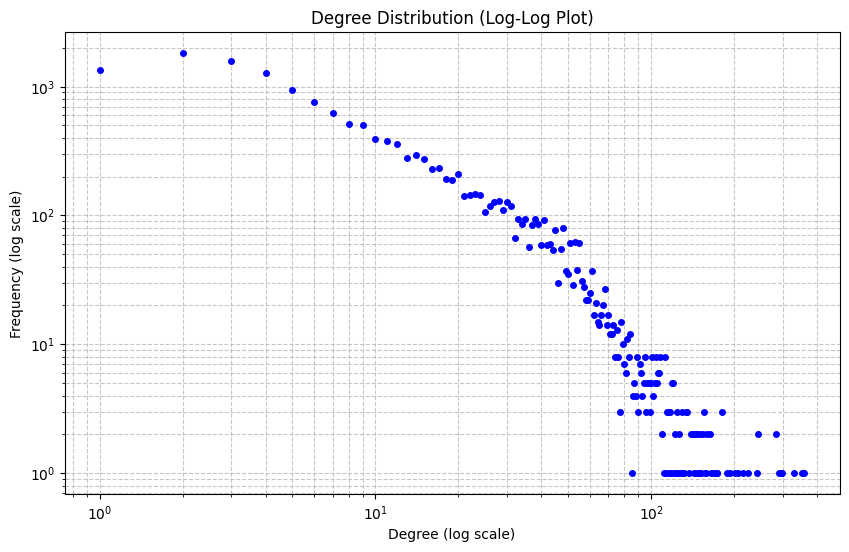

In [13]:
# Plot with logarithmic scaling
plt.figure(figsize=(10, 6))
plt.loglog(degree_values, frequencies, marker='o', linestyle='None', color='b', markersize=4)

# Add labels and title
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution (Log-Log Plot)')
plt.grid(which='both', linestyle='--', alpha=0.7)
plt.savefig('Astro_DegreeDist')
# Show the plot
plt.show()